___
# Ciência dos Dados - PROJETO 3 - INSPER

___
## Guilherme Leite

## Gabriel Brey

## Leonardo Neves

___

___

## INTRODUÇÃO

A indústria cinematográfica é umas das maiores do mercado de entretenimento, movimentando bilhões de dólares anualmente,e com isso gera um grande risco financeiro, com alguns filmes recentes com orçamentos de até 400 milhões de dólares.
Esse risco poderia ser redusido até certo ponto com o uso de um modelo quantitativo.

O objetivo do projeto é estimar o rendimento de um filme em relação a época do ano que é lançado e seu orçamento, assim tendo o intuito de fazer um modelo de predição com variaveis que geralemnte ja são conhecidas antes da estreia do filme.

A base de dados contém informações de aproximadamente 5000 filmes do site TMDB, que concentra vários dados sobre a produção, gênero, entre outros de peças cinematográficas.

___
## MINERANDO DADOS e CARACTERÍSTICAS DO DATASET

Os dados coletados que serão utilizados são : o revenue, budget , release date,popularity ,vote_count e vote_average. O revenue se refere a quanto o filme faturou em todo o mundo em dólares americanos, o budget é referente ao orçamento do filme, também em dólares americanos ,o release date é a data de lançamento mundial no formato dia/mês/ano  , a popularity é referente ao numero de pessoas que foram assistir o filme , vote_count é referente ao total de vezes em que o filme foi votado no TMDB e o vote_average é a nota media atribuída ao filme no TMDB .


In [17]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [18]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Leonardo\OneDrive\insper\dps_2018\ciencia_dos_dados\DPCD-master2\DPCD-master\Projeto3


### BASE DE DADOS

In [19]:
tmdb = pd.read_csv('tmdb_5000_movies.csv', encoding='latin1')#Abre o dataframe inteiro

data = tmdb[['revenue','budget','release_date','vote_count','popularity','vote_average']]#Separa as colunas
data = data[~(data == 0).any(axis=1)] #remove filmes que tenham, algum dos dados igual a 0
nndf = data[pd.notnull(data.revenue)&pd.notnull(data.budget)]#Tira os "NaN" do df
nndf = nndf.reset_index(drop=True)#Reseta o index dos filmes
nndf.head()

,revenue,budget,release_date,vote_count,popularity,vote_average
0,2787965087,237000000,2009-12-10,11800,150.437577,7.2
1,961000000,300000000,2007-05-19,4500,139.082615,6.9
2,880674609,245000000,2015-10-26,4466,107.376788,6.3
3,1084939099,250000000,2012-07-16,9106,112.312950,7.6
4,284139100,260000000,2012-03-07,2124,43.926995,6.1


In [20]:
for i in range (len(nndf)): #Deixa a data de lançamento como só o mes envez de DD/MM/YYYY
    Str = str(nndf.release_date[i])	
    SStr = Str.split('-')
    nndf.release_date[i] = SStr[1]

C:\Users\Leonardo\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### ANÁLISE DESCRITIVA

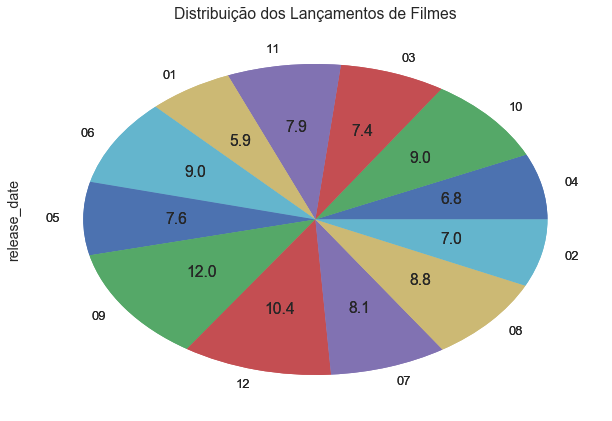

In [46]:
ut15 = (nndf.release_date.value_counts(sort=False, normalize=True)*100)
a4_dims = (10, 6)
plot = ut15.plot(kind='pie',title = "Distribuição dos Lançamentos de Filmes",autopct='%.1f')
plt.show()

Este gráfico demonstra como a distribuição dos lançamentos é semelhante entre os meses, mostrando que não existe uma grande preferência pela data de lançamento dos filmes

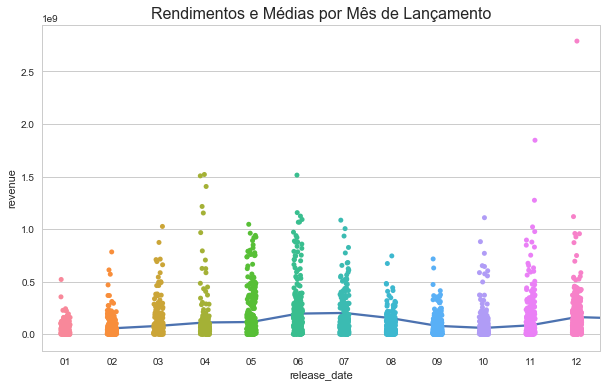

In [47]:
sns.set(style="whitegrid", color_codes=True)
fig, ax = plt.subplots(figsize=a4_dims)
plt.title('Rendimentos e Médias por Mês de Lançamento', fontsize=16)
sns.set_context("talk")
sns.stripplot(x="release_date", y="revenue", data=nndf, jitter=True);

X2  = ['01','02','03','04','05','06','07','08','09','10','11','12',]#ordena os meses
#média de cada mês
Y2 = [nndf.loc[nndf['release_date'] == '01'].mean()[0],nndf.loc[nndf['release_date'] == '02'].mean()[0],
nndf.loc[nndf['release_date'] == '03'].mean()[0],nndf.loc[nndf['release_date'] == '04'].mean()[0],
nndf.loc[nndf['release_date'] == '05'].mean()[0],nndf.loc[nndf['release_date'] == '06'].mean()[0],
nndf.loc[nndf['release_date'] == '07'].mean()[0],nndf.loc[nndf['release_date'] == '08'].mean()[0],
nndf.loc[nndf['release_date'] == '09'].mean()[0],nndf.loc[nndf['release_date'] == '10'].mean()[0],
nndf.loc[nndf['release_date'] == '11'].mean()[0],nndf.loc[nndf['release_date'] == '12'].mean()[0]]
plt.plot(X2,Y2)

plt.show() 

Os gráficos acima mostram como o revenue dos filmes ocorre nos meses do ano, é possível perceber que os meses Maio, Junho , Julho, Novembro possuem maior rendimento médio, enquanto Janeiro e Setembro apresentão um rendimento menor.

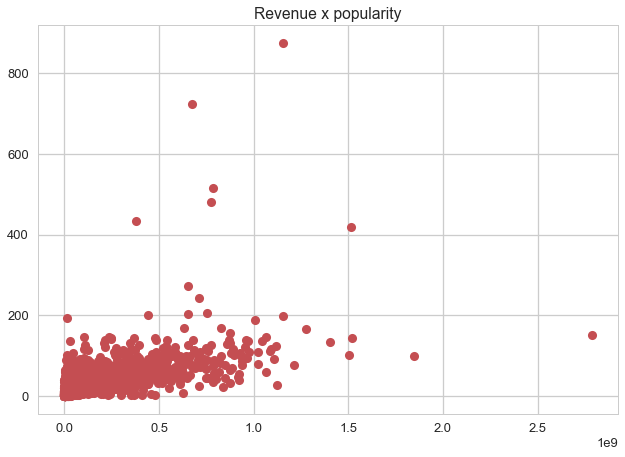

In [26]:
plt.plot(nndf['revenue'],nndf['popularity'],'ro')
plt.title('Revenue x popularity')
plt.show()

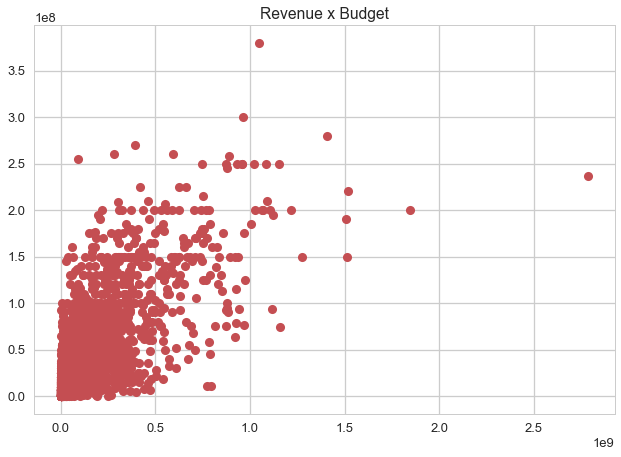

In [25]:
plt.plot(nndf['revenue'],nndf['budget'],'ro')
plt.title('Revenue x Budget')
plt.show()

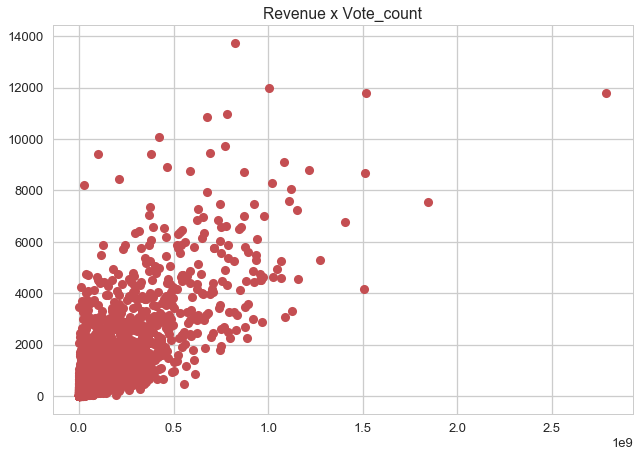

In [27]:
plt.plot(nndf['revenue'],nndf['vote_count'],'ro')
plt.title('Revenue x Vote_count')
plt.show()

Ao observar os scatter plots notamos duas fortes correlações das variaves Reveneu x Budget e Reveneu x Vote_count e uma fraca correlação positiva do Reveneu x Popularity.
Assim optamos por escolher a variável Budget juntamente com a variável release date para fazer os nossos modelos de predição.

___
## MODELOS DE PREDIÇÃO

[O tópico C.PROCESSO E ESTATÍSTICAS DE VALIDAÇÃO estará dentro deste tópico. Organize-o aqui de forma clara!]

[ORGANIZE AQUI TODOS OS MODELOS DE PREDIÇÃO NECESSÁRIOS NESTE PROJETO!]

In [66]:
x = len (nndf)
nndf.sample(frac=1)# Aleatoriza o index de cada filme
DfTrain = nndf.iloc[:int(0.75*x)]# separa os filmes de 75% primeiros filmes como Treinamento
DfTrain = DfTrain.reset_index(drop=True)#Reseta o index dos filmes
DfTest = nndf.iloc[int(0.75*x):]# separa os filmes de 25% últimos filmes como Teste
DfTest = DfTest.reset_index(drop=True)#Reseta o index dos filmes

print("Valores para o dataframe de treinamento\n",DfTrain.describe())
print("\nValores para o dataframe de teste\n",DfTest.describe())

Valores para o dataframe de treinamento
             revenue        budget    vote_count   popularity  vote_average
count  2.420000e+03  2.420000e+03   2420.000000  2420.000000   2420.000000
mean   1.518250e+08  5.245354e+07   1157.124380    33.088898      6.253058
std    2.039433e+08  4.542804e+07   1540.789781    39.590539      0.844785
min    1.100000e+01  1.100000e+01      2.000000     0.068228      2.300000
25%    3.270261e+07  2.000000e+07    250.000000    13.361539      5.700000
50%    8.327026e+07  3.700000e+07    584.000000    24.300495      6.300000
75%    1.810004e+08  6.900000e+07   1402.250000    41.805352      6.800000
max    2.787965e+09  3.800000e+08  13752.000000   875.581305      8.500000

Valores para o dataframe de teste
             revenue        budget   vote_count  popularity  vote_average
count  8.070000e+02  8.070000e+02   807.000000  807.000000    807.000000
mean   2.983531e+07  5.369058e+06   440.421314   16.944274      6.493804
std    5.446798e+07  5.652859

As médias e desvios padrão para ambos os dataframes são muito próximos, dessa forma, é possível dizer que ambos tem as mesmas características e serão menos suscetíveis a overfitting e underfitting.  

In [67]:
import numpy as np
import statsmodels.api as sm

X = DfTrain[['release_date','budget']].round(0).astype(int)
X = X.values.reshape((len(X),2))
Y = DfTrain['revenue'].round(0).astype(int)
Y = Y.values.reshape((len(Y),1))

XTest = DfTest[['release_date','budget']].round(0).astype(int)
XTest = XTest.values.reshape((len(XTest),2))
YTest = DfTest['revenue'].round(0).astype(int)
YTest = YTest.values.reshape((len(YTest),1))

 R-squared , é um numero entre 0 e 1 , ele conta como a sua linha se encaixa no data set, assim podemos dizer que o R-squared retorna o valor até certo ponto em que a variavel-x pode ser usada para predizer os valores da variavel Y.
No caso do nosso modelo , o R2 nos conta o a qualidade da predição do reveneu pelo sua data de lançamento .

Predição pela media 

In [68]:
media = DfTrain.revenue.mean()

S =  (DfTrain.revenue-media)**2
ss = S.sum()
RMS = np.sqrt(ss/len( DfTrain.revenue))

print("Média total: ",media)
print("R2 é igual a zero uma vez que fi é igual a media de y: 1 - ((yi-fi)/(yi-yb)) = 0")
print("RMS da Predição pela media:", RMS)


Média total:  151824958.12396693
R2 é igual a zero uma vez que fi é igual a media de y: 1 - ((yi-fi)/(yi-yb)) = 0
RMS da Predição pela media: 203901169.344


MODELO DE REGRESSÃO LINEAR ( ordinary least squares):

In [69]:
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit() 
Ypredictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     943.5
Date:                Tue, 05 Jun 2018   Prob (F-statistic):          1.47e-303
Time:                        19:29:46   Log-Likelihood:                -48986.
No. Observations:                2420   AIC:                         9.798e+04
Df Residuals:                    2417   BIC:                         9.800e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.066e+06   7.84e+06     -1.157      0.248   -2.44e+07    6.31e+06
x1          9.305e+05   8.99e+05      1.035      0.301   -8.33e+05    2.69e+06
x2             2.9086      0.067     43.421      0.000       2.777       3.040
==============================================================================
Omnibus:                      824.944   Durbin-Watson:                   1.504
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            77619.298
Skew:                           0.637   Prob(JB):                         0.00
Kurtosis:                      30.716   Cond. No.                     1.80e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
ybar = Ypredictions.mean()
S =  (Ypredictions-ybar)**2
ss = S.sum()
RMSTrain = np.sqrt(ss/len( Ypredictions))

print("RMS do Treinamento:",RMSTrain)

RMS do Treinamento: 132157754.556


In [71]:
XTest = sm.add_constant(XTest)
YTestpredictions = model.predict(XTest) # cria um array com as predições para a base de teste com o 
                                        # modelo da base de treinamento

In [72]:
media = DfTest.revenue.mean()
S = (YTestpredictions-media)**2 
ss = S.sum()
RMSTest = np.sqrt(ss/len( DfTrain.revenue))
print("RMS do Teste:",RMSTest)

RMS do Teste: 13754382.0567


In [75]:
y = DfTest['revenue'].round(0).astype(int)
ybar = y.mean()
yhat = YTestpredictions                   
ssreg = np.sum((y-yhat)**2)   
sstot = np.sum((y - ybar)**2)    
r2Test = 1-( ssreg / sstot)
print("R2 do Teste: ",r2Test)

R2 do Teste:  -0.1047817775051112


In [76]:
RMSTrain/RMSTest

9.6084109058088671

Regressão sem o Release Date:

In [62]:
X = DfTrain['budget'].round(0).astype(int)
X = X.values.reshape((len(X),1))
Y = DfTrain['revenue'].round(0).astype(int)
Y = Y.values.reshape((len(Y),1))

XTest = DfTest['budget'].round(0).astype(int)
XTest = XTest.values.reshape((len(XTest),1))
YTest = DfTest['revenue'].round(0).astype(int)
YTest = YTest.values.reshape((len(YTest),1))

In [63]:
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit() 
Ypredictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     1886.
Date:                Tue, 05 Jun 2018   Prob (F-statistic):          4.60e-305
Time:                        19:24:32   Log-Likelihood:                -48987.
No. Observations:                2420   AIC:                         9.798e+04
Df Residuals:                    2418   BIC:                         9.799e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.534e+06   4.65e+06     -0.545      0.586   -1.16e+07    6.58e+06
x1             2.9089      0.067     43.426      0.000       2.778       3.040
==============================================================================
Omnibus:                      826.431   Durbin-Watson:                   1.503
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            76640.829
Skew:                           0.645   Prob(JB):                         0.00
Kurtosis:                      30.539   Cond. No.                     1.06e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
ybar = Ypredictions.mean()
S =  (Ypredictions-ybar)**2
ss = S.sum()
RMSTrain = np.sqrt(ss/len( Ypredictions))

print("RMS do Treinamento:",RMSTrain)

RMS do Treinamento: 132120251.101


In [40]:
XTest = sm.add_constant(XTest)
YTestpredictions = model.predict(XTest) # cria um array com as predições para a base de teste com o 
                                        # modelo da base de treinamento

In [41]:
media = DfTest.revenue.mean()
S = (YTestpredictions-media)**2 
ss = S.sum()
RMSTest = np.sqrt(ss/len( DfTrain.revenue))
print("RMS do Teste:",RMSTest)

RMS do Teste: 13551077.2509


In [42]:
y = DfTest['revenue'].round(0).astype(int)
ybar = y.mean()
yhat = YTestpredictions                   
ssreg = np.sum((y-yhat)**2)   
sstot = np.sum((y - ybar)**2)    
r2Test = 1-( ssreg / sstot)
print("R2 do Teste: ",r2Test)

R2 do Teste:  -0.10343513143527217


In [43]:
RMSTrain/RMSTest

9.749796909468353

In [44]:
y = DfTrain['revenue'].round(0).astype(int)
ybar = y.mean()
yhat = Ypredictions                   
ssreg = np.sum((y-yhat)**2)   
sstot = np.sum((y - ybar)**2)    
r2=1-( ssreg / sstot)
r2

0.43816836358742495

___
## CONCLUSÃO

___
## REFERÊNCIAS BIBLIOGRÁFICAS

https://www.kaggle.com/tmdb/tmdb-movie-metadata - Acessado em 25/05/2018

https://www.themoviedb.org/?language=en - Acessado em 25/05/2018

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html - 
Acessado em 28/05/2018

https://ensinandomaquinasblog.wordpress.com/2017/12/15/modelos-preditivos-de-notas-de-redacao-do-enem-2015/  - Acessado em 25/05/2018

http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate - Acessado em 27/05/2018

https://pt.stackoverflow.com/questions/66777/d%C3%BAvidas-na-utiliza%C3%A7%C3%A3o-de-stratified-k-fold-no-scikit-learn - Acessado em 2/06/2018